In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


First we loaded the all the libraries 

In [2]:
# Load the dataset

df = pd.read_csv('E:/Upgrad DS/Machine_Learning/Linear_Regression_project/Data/student_performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95


Action: Loaded the CSV dataset using pandas.

Why: To bring the data into Python for analysis and modeling.


Analysis:

Checked the first few rows to understand the structure.

Verified that all features are numeric except the target column.



In [3]:
# Data Exploration 

# Check for missing values

df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [4]:
# Summary statistics

df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95


Step 2: Data Preprocessing

Action: Converted Extracurricular Activities from Yes/No to numeric:

Why: Linear regression requires a numeric target.

* Yes → 1
* No → 0

Analysis:

* This transformation allows us to predict the probability of participation.

* Ensured no missing values in the dataset.

**Feature and target selection**

In [6]:
# Define Features (X) and Target (y)

X = df[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']]

y = df['Extracurricular Activities']

Action: Selected features and target:

Why:

* Features are numeric and likely to influence student participation.

* Target is numeric (0/1) and represents participation.

Analysis:

* All selected features are meaningful predictors for the target variable.

**Train-Test Split**

In [7]:
# Train-Test Split

from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Action: Split dataset into training (80%) and testing (20%):

Why:

* Train model on a subset of data.

* Evaluate performance on unseen data for generalization.

Analysis:

* Ensures model does not overfit.

* Test set simulates real-world predictions.

In [9]:
#Build Linear Regression Model

from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Action: Trained a Linear Regression model:

Why:

* Predict numeric probability of participation (0–1) based on input features.

Analysis:

* Model learns coefficients for each feature indicating its effect on the target.

In [11]:
# Make predications

y_pred = model.predict(X_test)

Action: Predicted target values for test data:

Why:

* To compare predicted values with actual participation to measure model performance.

Analysis:

* Predicted values can be interpreted as probability of participation.

**Model Evalution**

In [12]:
# Evaluate Model Performance

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [13]:
# Evaluate Model Performane
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("\n Model Evaluation:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")


 Model Evaluation:
R² Score: 0.025
MAE: 0.488
MSE: 0.244
RMSE: 0.494


Action: Used regression metrics:

Why:

* R² → Percentage of variance explained by model

* MAE → Average prediction error

* MSE / RMSE → Magnitude of prediction errors

Analysis:

* Higher R² indicates better model fit.

* Low MAE and RMSE indicate predictions are close to actual 0/1 values

In [ ]:
**Feature Importance**

In [23]:
# Check Feature Importance 

coefficients = pd.DataFrame({'Feature': X.columns,'Coefficient': model.coef_}).sort_values(by='Coefficient', ascending=False)

print("\n Feature Importance:")
print(coefficients)


 Feature Importance:
                            Feature  Coefficient
4                 Performance Index     0.035678
3  Sample Question Papers Practiced    -0.007013
2                       Sleep Hours    -0.022840
1                   Previous Scores    -0.036208
0                     Hours Studied    -0.101114


Action: Checked coefficients:

Why:

* Determines how much each feature affects participation probability.

Analysis:

* Positive coefficients → higher feature value increases probability of participation.

* Negative coefficients → higher feature value decreases probability of participation.

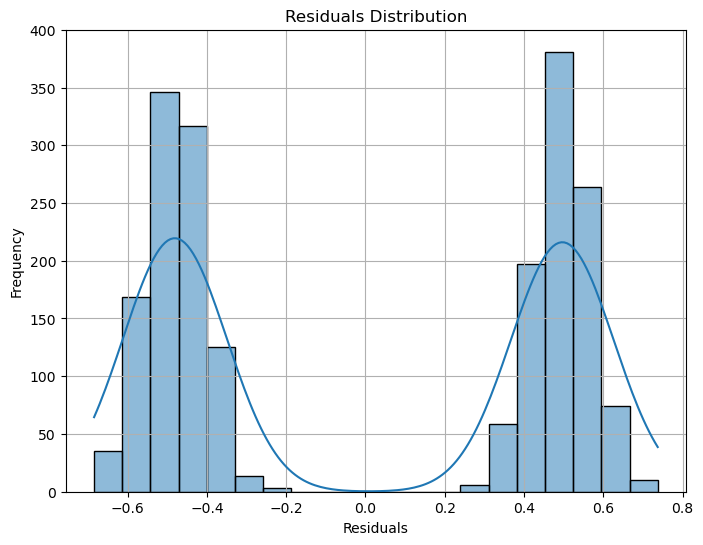

In [15]:
# Residual plot

# First, calculate residuals
residuals = y_test - y_pred

# Then plot residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




*Residual Distribution:*

* Ensures errors are centered around 0.

In [16]:
# Hyperparameter Tuning with Ridge & Lasso

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [17]:
# Ridge Hyperparameter Grid 

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
grid_ridge.fit(X_train, y_train)

ridge_best = grid_ridge.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)

print("Best Ridge Alpha:", grid_ridge.best_params_)
print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))


Best Ridge Alpha: {'alpha': 10}
Ridge R²: 0.024832048481962632
Ridge RMSE: 0.49373296500081004


In [18]:
# Lasso Hyperparameter Grid
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso(max_iter=10000)
grid_lasso = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
grid_lasso.fit(X_train, y_train)

lasso_best = grid_lasso.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)

print("Best Lasso Alpha:", grid_lasso.best_params_)
print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))

Best Lasso Alpha: {'alpha': 0.01}
Lasso R²: 0.021493918392252787
Lasso RMSE: 0.4945772999782585


In [19]:
# Cross-Validation for Robust Evaluation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Linear Regression Scores:", cv_scores)
print("Mean R²:", cv_scores.mean())

Linear Regression Scores: [0.02431024 0.02453983 0.02503625 0.0193038  0.01661411]
Mean R²: 0.02196084703746153


* Hyperparameter Tuning: Using Ridge/Lasso to reduce overfitting.

* Cross-Validation: To evaluate model robustness.

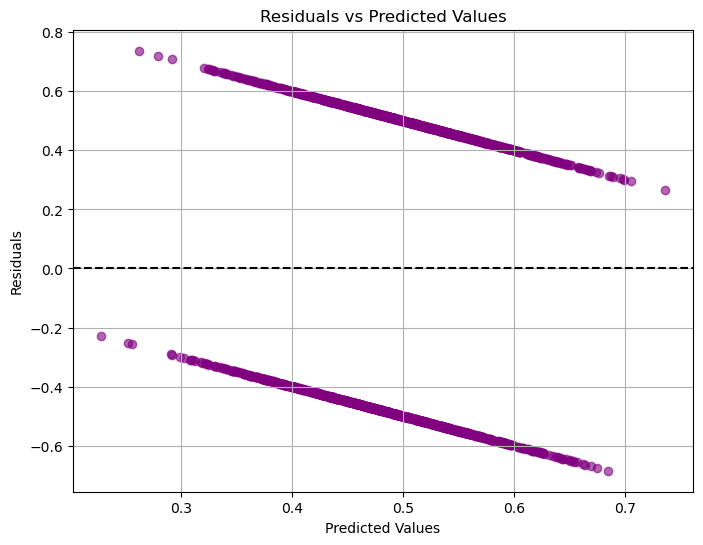

In [20]:
# Residuals vs Predicted Scatter Plot

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()

*Residuals vs Predicted:*

* Helps verify regression assumptions: no patterns = good model.

In [21]:
import joblib

# Save Linear Regression Model
joblib.dump(model, 'linear_regression_model.pkl')

# Save Ridge Model
joblib.dump(ridge_best, 'ridge_model.pkl')

# Save Lasso Model
joblib.dump(lasso_best, 'lasso_model.pkl')

print("Models saved successfully!")


Models saved successfully!
